In diesem Notebook wird ein eigenes Convolutional Neural Network erstellt.

Zuerst werden die später verwendeten Datasets importiert.

In [1]:
%pip install tensorflow_datasets

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Install necessary libraries if not already installed
%pip install tensorflow scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [3]:
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras import layers

import matplotlib.pyplot as plt
import seaborn as sns

import math
import pandas as pd
import numpy as np
# Import required modules
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras import layers
import numpy as np
from sklearn.metrics import classification_report, f1_score

2024-12-21 19:04:10.753888: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1734807850.773488   39238 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1734807850.779693   39238 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-21 19:04:10.802144: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


im Hauptschritt wird das CNN Modell trainiert und auf Testdaten angewendet.
Dafür werden die Daten importiert und auf die gleichen Grössen angepasst.
Die Batch size der Trainingsdaten wird auf 32 festgelegt. Dieselbe Batchsize wird auch auf die Testdaten angewendet.
Zuletzt wird das Modell trainiert und gefitted. Die Gesamtdauer des Modells wird gemessen.

In [4]:
# Normalisierungsfunktion
def normalize_img(image, label):
    image = tf.image.convert_image_dtype(image, tf.float32)  # Normiere die Pixelwerte auf [0, 1]
    return image, label

# Datenverzeichnisse
train_dir = "./vehicles/train"
test_dir = "./vehicles/test"

# Trainingsdaten
train_dataset = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    image_size=(128, 128),
    batch_size=32,  # Batchgrösse definieren
    label_mode='categorical'  # One-Hot-Labels
)
train_dataset = train_dataset.map(normalize_img, num_parallel_calls=tf.data.AUTOTUNE)
train_dataset = train_dataset.cache()
train_dataset = train_dataset.prefetch(tf.data.AUTOTUNE)

# Testdaten
test_dataset = tf.keras.utils.image_dataset_from_directory(
    test_dir,
    image_size=(128, 128),
    batch_size=32,  # Batchgrösse definieren
    label_mode='categorical'
)
test_dataset = test_dataset.map(normalize_img, num_parallel_calls=tf.data.AUTOTUNE)
test_dataset = test_dataset.cache()
test_dataset = test_dataset.prefetch(tf.data.AUTOTUNE)

model = tf.keras.Sequential([
    layers.Input(shape=(128, 128, 3)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(7, activation='softmax')
])

import time

# Startzeit erfassen
start_time = time.time()

# Modell kompilieren
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',  # Passend für One-Hot-Labels
    metrics=['accuracy']
)

# Training
model.fit(
    train_dataset,
    epochs=11,
    validation_data=test_dataset
)

# Endzeit erfassen
end_time = time.time()

# Dauer berechnen
training_duration = end_time - start_time
hours, rem = divmod(training_duration, 3600)
minutes, seconds = divmod(rem, 60)

print(f"Trainingsdauer: {int(hours)} Stunden, {int(minutes)} Minuten, {seconds:.2f} Sekunden")

Found 384 files belonging to 7 classes.
Found 46 files belonging to 7 classes.
Epoch 1/11


W0000 00:00:1734807853.962950   39238 gpu_device.cc:2344] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


12/12 ━━━━━━━━━━━━━━━━━━━━ 9s 619ms/step - accuracy: 0.1682 - loss: 125.2458 - val_accuracy: 0.1957 - val_loss: 2.0345
Epoch 2/11
12/12 ━━━━━━━━━━━━━━━━━━━━ 7s 617ms/step - accuracy: 0.2653 - loss: 1.9295 - val_accuracy: 0.2174 - val_loss: 1.8506
Epoch 3/11
12/12 ━━━━━━━━━━━━━━━━━━━━ 8s 655ms/step - accuracy: 0.5051 - loss: 1.3964 - val_accuracy: 0.3696 - val_loss: 1.8800
Epoch 4/11
12/12 ━━━━━━━━━━━━━━━━━━━━ 7s 583ms/step - accuracy: 0.6364 - loss: 1.0951 - val_accuracy: 0.3478 - val_loss: 2.1720
Epoch 5/11
12/12 ━━━━━━━━━━━━━━━━━━━━ 7s 608ms/step - accuracy: 0.7177 - loss: 0.7770 - val_accuracy: 0.5217 - val_loss: 1.8498
Epoch 6/11
12/12 ━━━━━━━━━━━━━━━━━━━━ 7s 633ms/step - accuracy: 0.9055 - loss: 0.3395 - val_accuracy: 0.4783 - val_loss: 2.5409
Epoch 7/11
12/12 ━━━━━━━━━━━━━━━━━━━━ 6s 508ms/step - accuracy: 0.9428 - loss: 0.1449 - val_accuracy: 0.4130 - val_loss: 2.9199
Epoch 8/11
12/12 ━━━━━━━━━━━━━━━━━━━━ 6s 527ms/step - accuracy: 0.9523 - loss: 0.1368 - val_accuracy: 0.4783 - va

In diesem Abschnitt werden Kennzahlen zum CNN herausgegeben.
Wichtig sind dabei neben der Trainingsdauer auch die Genauigkeit.
Zudem werden histplots und eine Konfusionsmatrix zu den unterschiedlichen Klassen ausgegeben.

In [5]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │           903 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,916,631 (37.83 MB)

 Trainable params: 3,305,543 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,611,088 (25.22 MB)

In [6]:
test_images = []
test_labels = []

for images, labels in test_dataset:
    test_images.append(images)
    test_labels.append(labels)

# Stapel alle Batches in ein Tensor zusammen
test_images = tf.concat(test_images, axis=0)
test_labels = tf.concat(test_labels, axis=0)

2024-12-21 19:05:30.845258: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step 


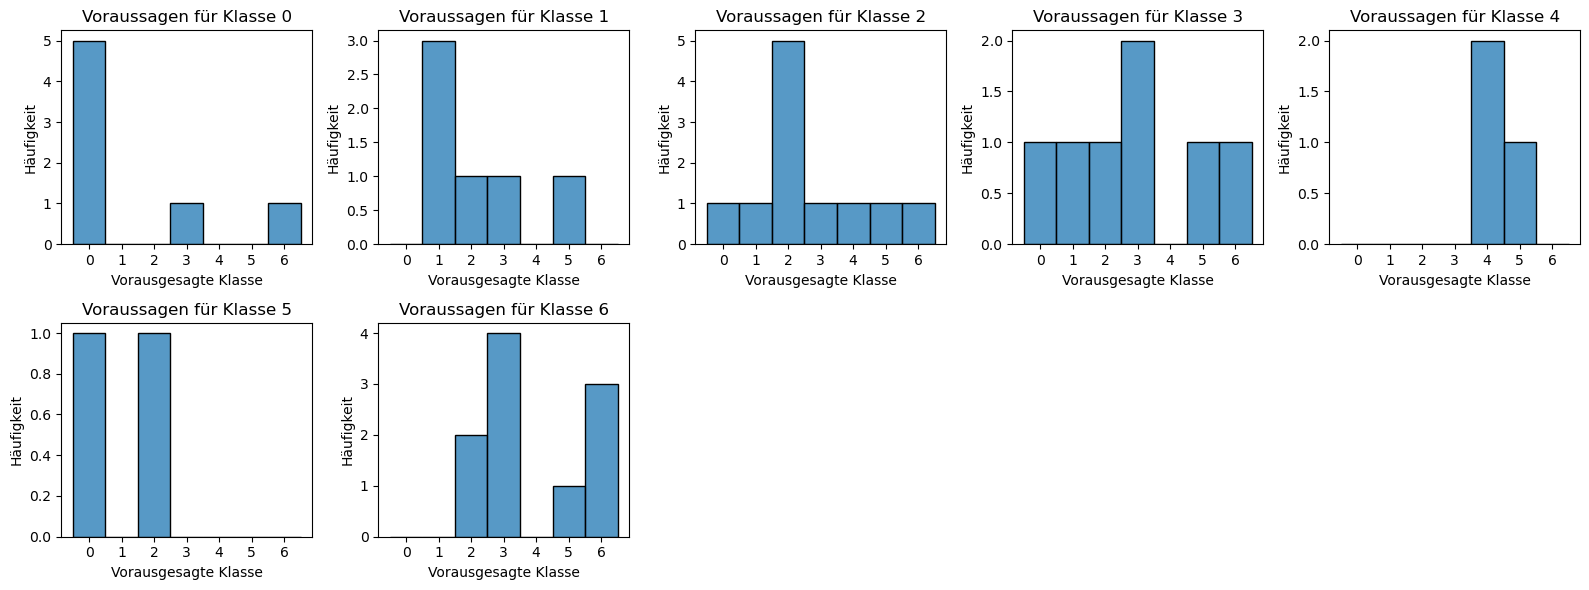

In [7]:
# Konvertiere One-Hot-Encoded Labels in eindimensionale Labels
true_labels = np.argmax(test_labels.numpy(), axis=1)
# Vorhersagen für die Testdaten
predictions = model.predict(test_images)

# Extrahiere die vorhergesagten Klassen (höchste Wahrscheinlichkeit)
predicted_labels = np.argmax(predictions, axis=1)

# Erstelle den DataFrame
results_df = pd.DataFrame({
    'True Label': true_labels,
    'Predicted Label': predicted_labels
})

plt.figure(figsize=(16, 6))
for i in range(7):  # Annahme: 7 Klassen
    plt.subplot(2, 5, i + 1)
    sns.histplot(results_df[results_df['True Label'] == i]['Predicted Label'], bins=np.arange(8) - 0.5)
    plt.title(f'Voraussagen für Klasse {i}')
    plt.xlabel('Vorausgesagte Klasse')
    plt.ylabel('Häufigkeit')
    plt.xticks(range(7))
plt.tight_layout()
plt.show()

In [9]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(true_labels, predicted_labels)
print(f"Genauigkeit: {accuracy:.4f}")

Genauigkeit: 0.4348


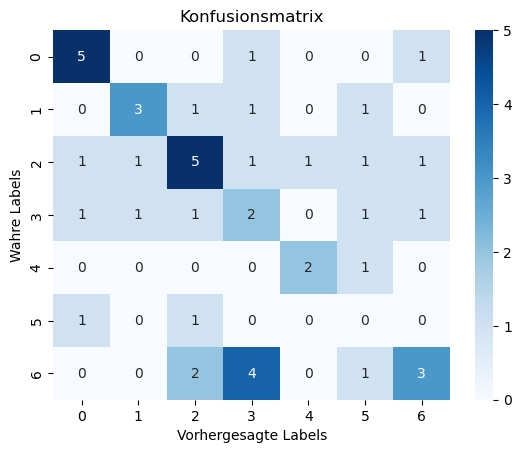

In [11]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(true_labels, predicted_labels)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Konfusionsmatrix")
plt.xlabel("Vorhergesagte Labels")
plt.ylabel("Wahre Labels")
plt.show()
